In [6]:
!pip install -r requirements.txt --quiet

In [8]:
from dotenv import load_dotenv

load_dotenv("../.env")

True

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#load in dataset from kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shrutimechlearn/churn-modelling",path='Churn_Modelling.csv').set_index('RowNumber')

C:\Users\jnewm\AppData\Local\Temp\ipykernel_19172\1541062878.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [35]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

# EDA

In [37]:
print("Amount of rows:", df.shape[0])

Amount of rows: 10000


In [38]:
df.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [40]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Vis

## Univariate Analysis

#### <b>Credit Score

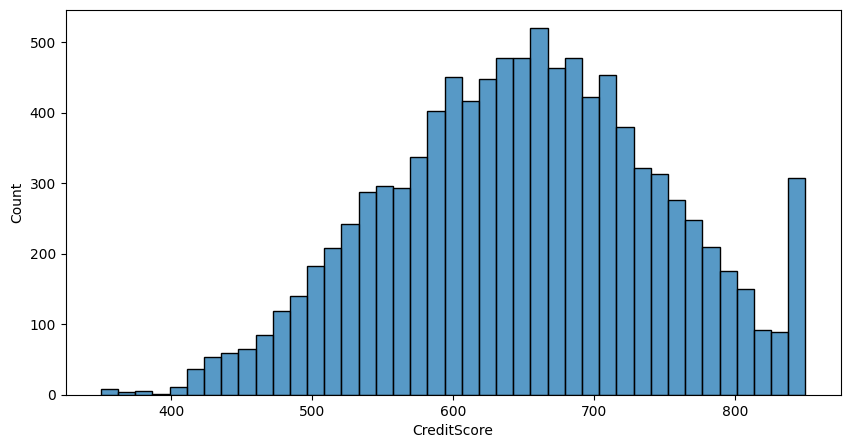

In [52]:
# Distribution of credit score counts
fig = plt.figure(figsize=(10,5))
sns.histplot(df['CreditScore'])
plt.show()

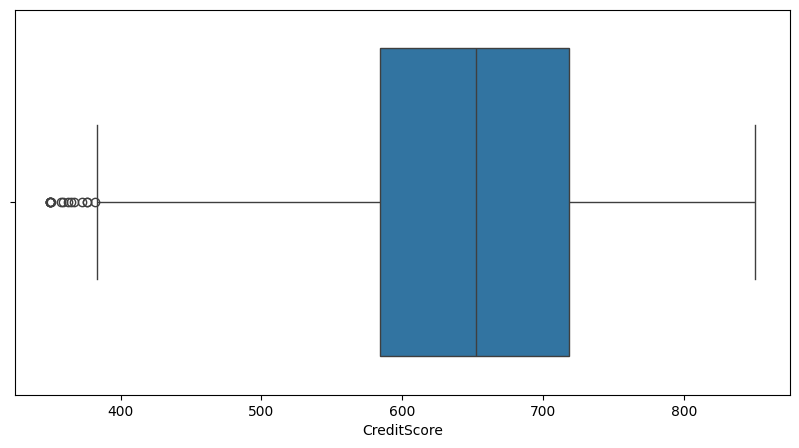

In [55]:
sns.boxplot(df['CreditScore'], orient='h')
plt.show()

#### <b> Geography

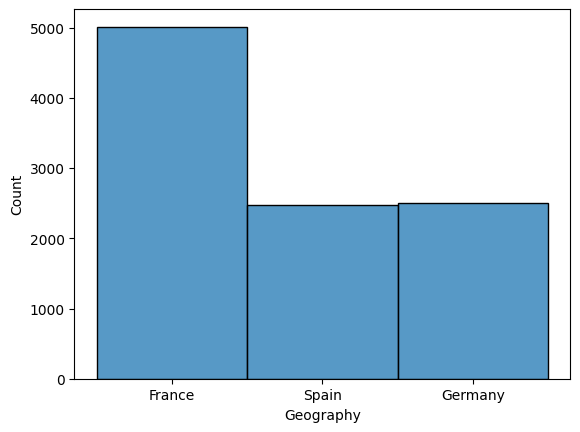

In [51]:
sns.histplot(df['Geography'])
plt.show()

### <b> Gender

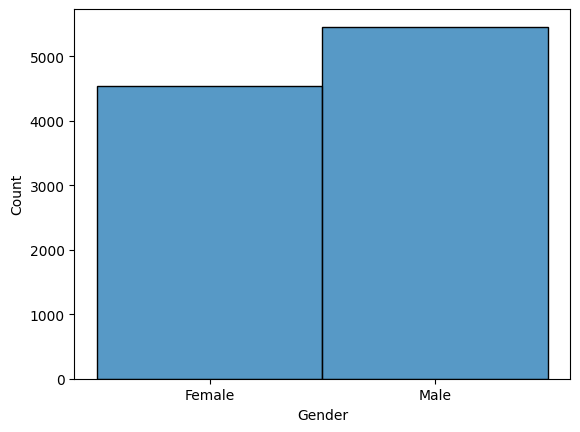

In [59]:
sns.histplot(df['Gender'])
plt.show()

#### <b> Age

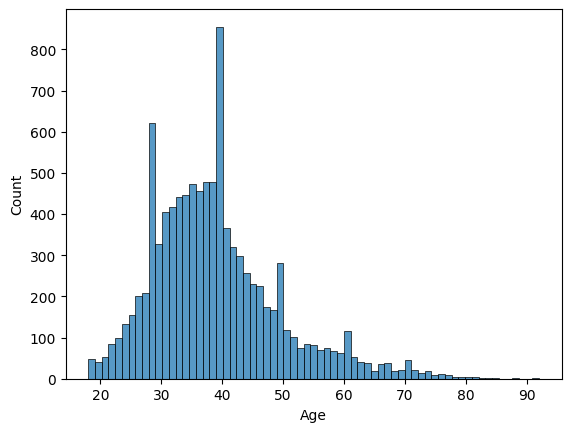

In [58]:
sns.histplot(df['Age'])
plt.show()

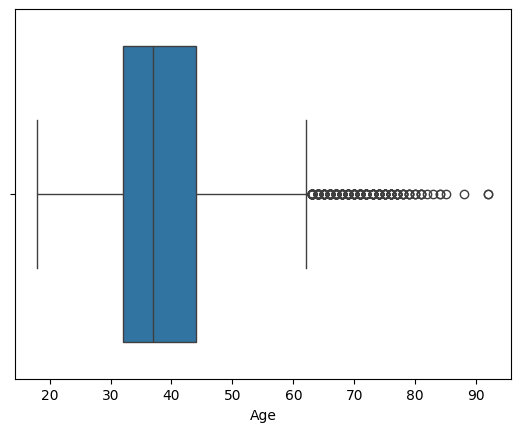

In [60]:
sns.boxplot(df['Age'], orient='h')
plt.show()

#### <b> Balance

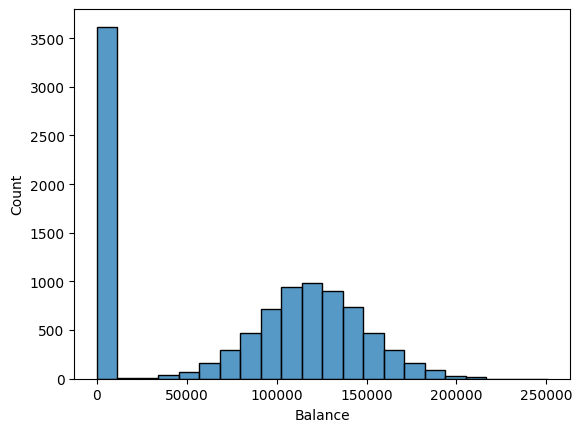

In [64]:
sns.histplot(df['Balance'])
plt.show()

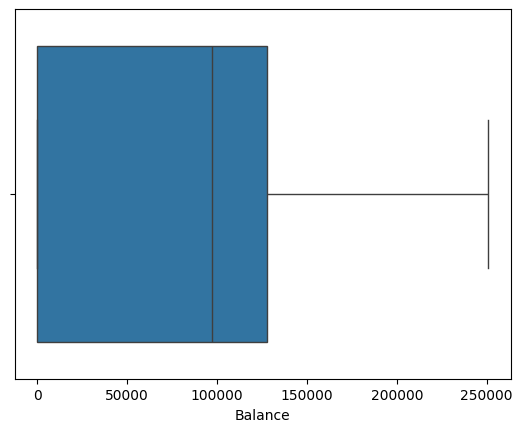

In [66]:
sns.boxplot(df['Balance'], orient='h')
plt.show()

#### <b> Tenure

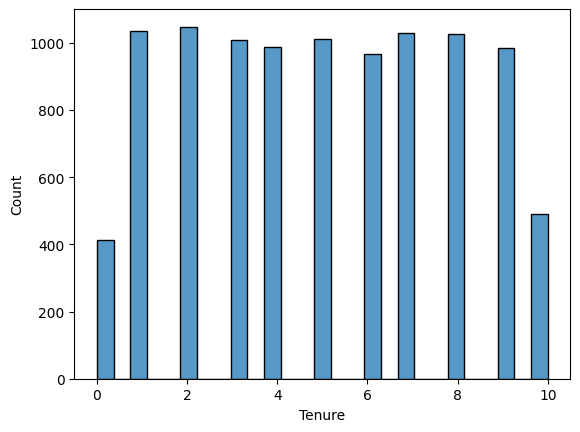

In [67]:
sns.histplot(df['Tenure'])
plt.show()

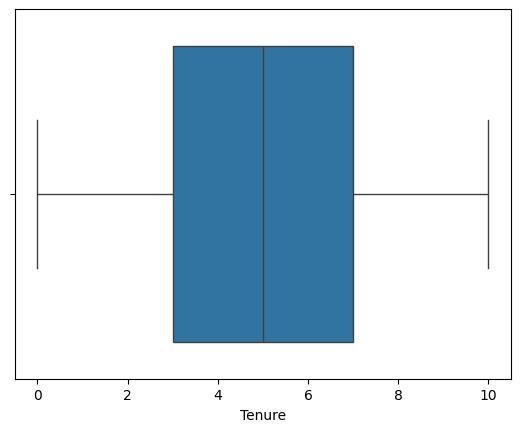

In [69]:
sns.boxplot(df['Tenure'], orient='h')
plt.show()

#### <b> Estimated Salary

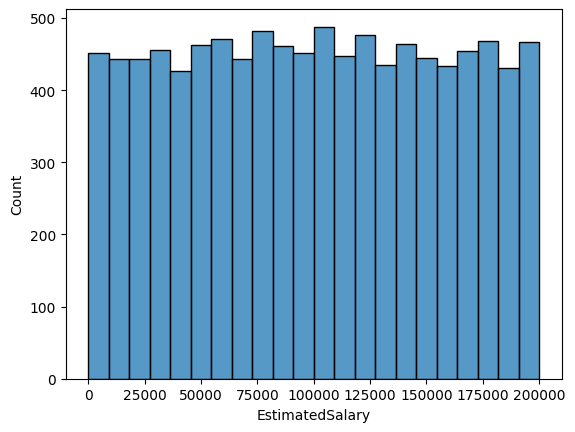

In [70]:
sns.histplot(df['EstimatedSalary'])
plt.show()

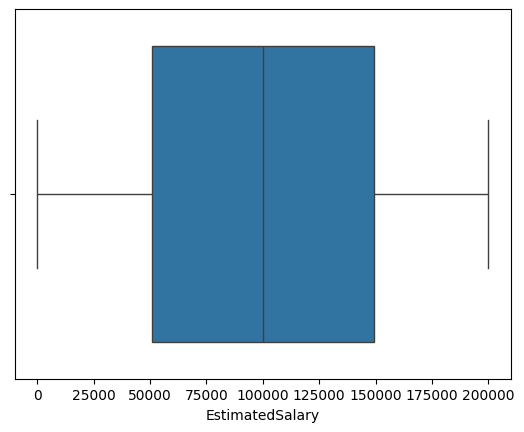

In [71]:
sns.boxplot(df['EstimatedSalary'], orient='h')
plt.show()

## Bivariate Analysis

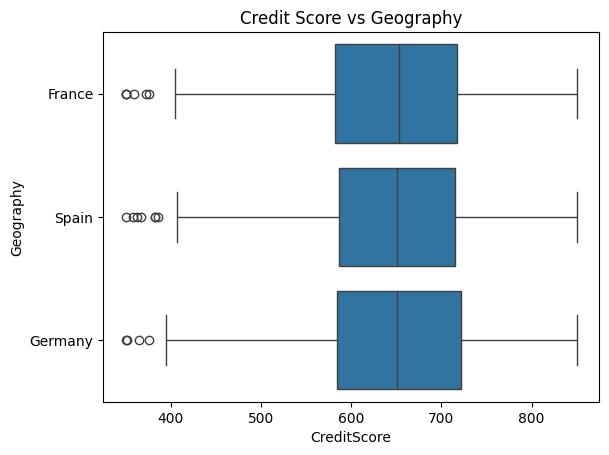

In [75]:
sns.boxplot(data=df, x='CreditScore', y='Geography')
plt.title('Credit Score vs Geography')
plt.show()

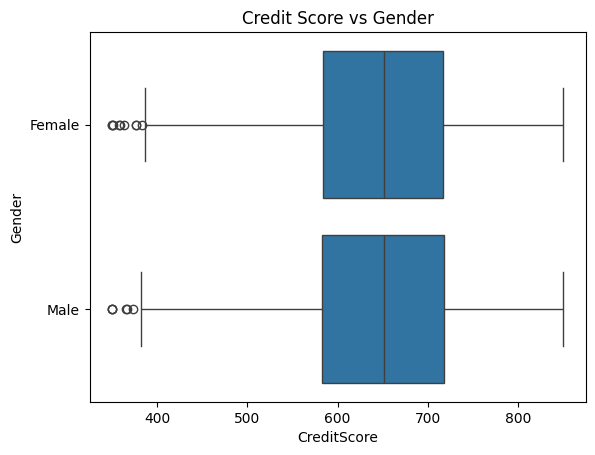

In [88]:
sns.boxplot(data=df, x='CreditScore', y='Gender')
plt.title('Credit Score vs Gender')
plt.show()

Looking at credit score vs geography, taking into account age and estimated salary

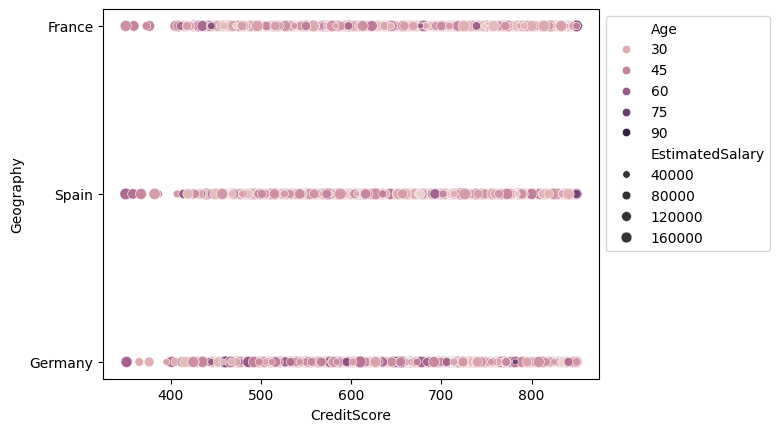

In [97]:
sns.scatterplot(data=df, x='CreditScore', y='Geography', hue='Age', size='EstimatedSalary')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Looking at credit score vs geography, taking into account gender and estimated salary

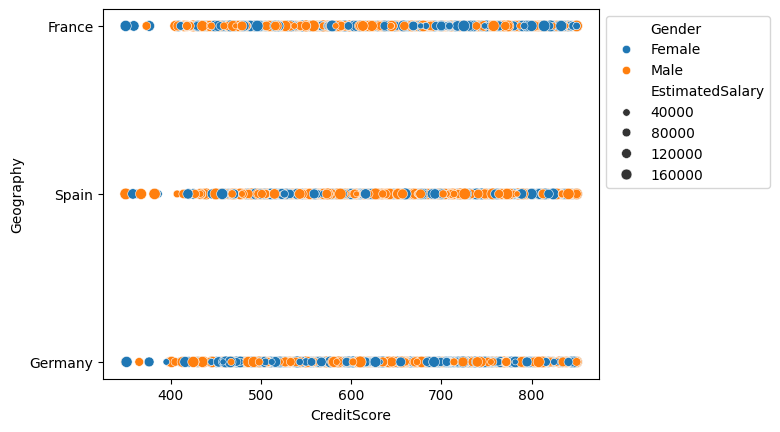

In [95]:
sns.scatterplot(data=df, x = 'CreditScore', y='Geography', hue='Gender', size='EstimatedSalary')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

## Multivariate analysis

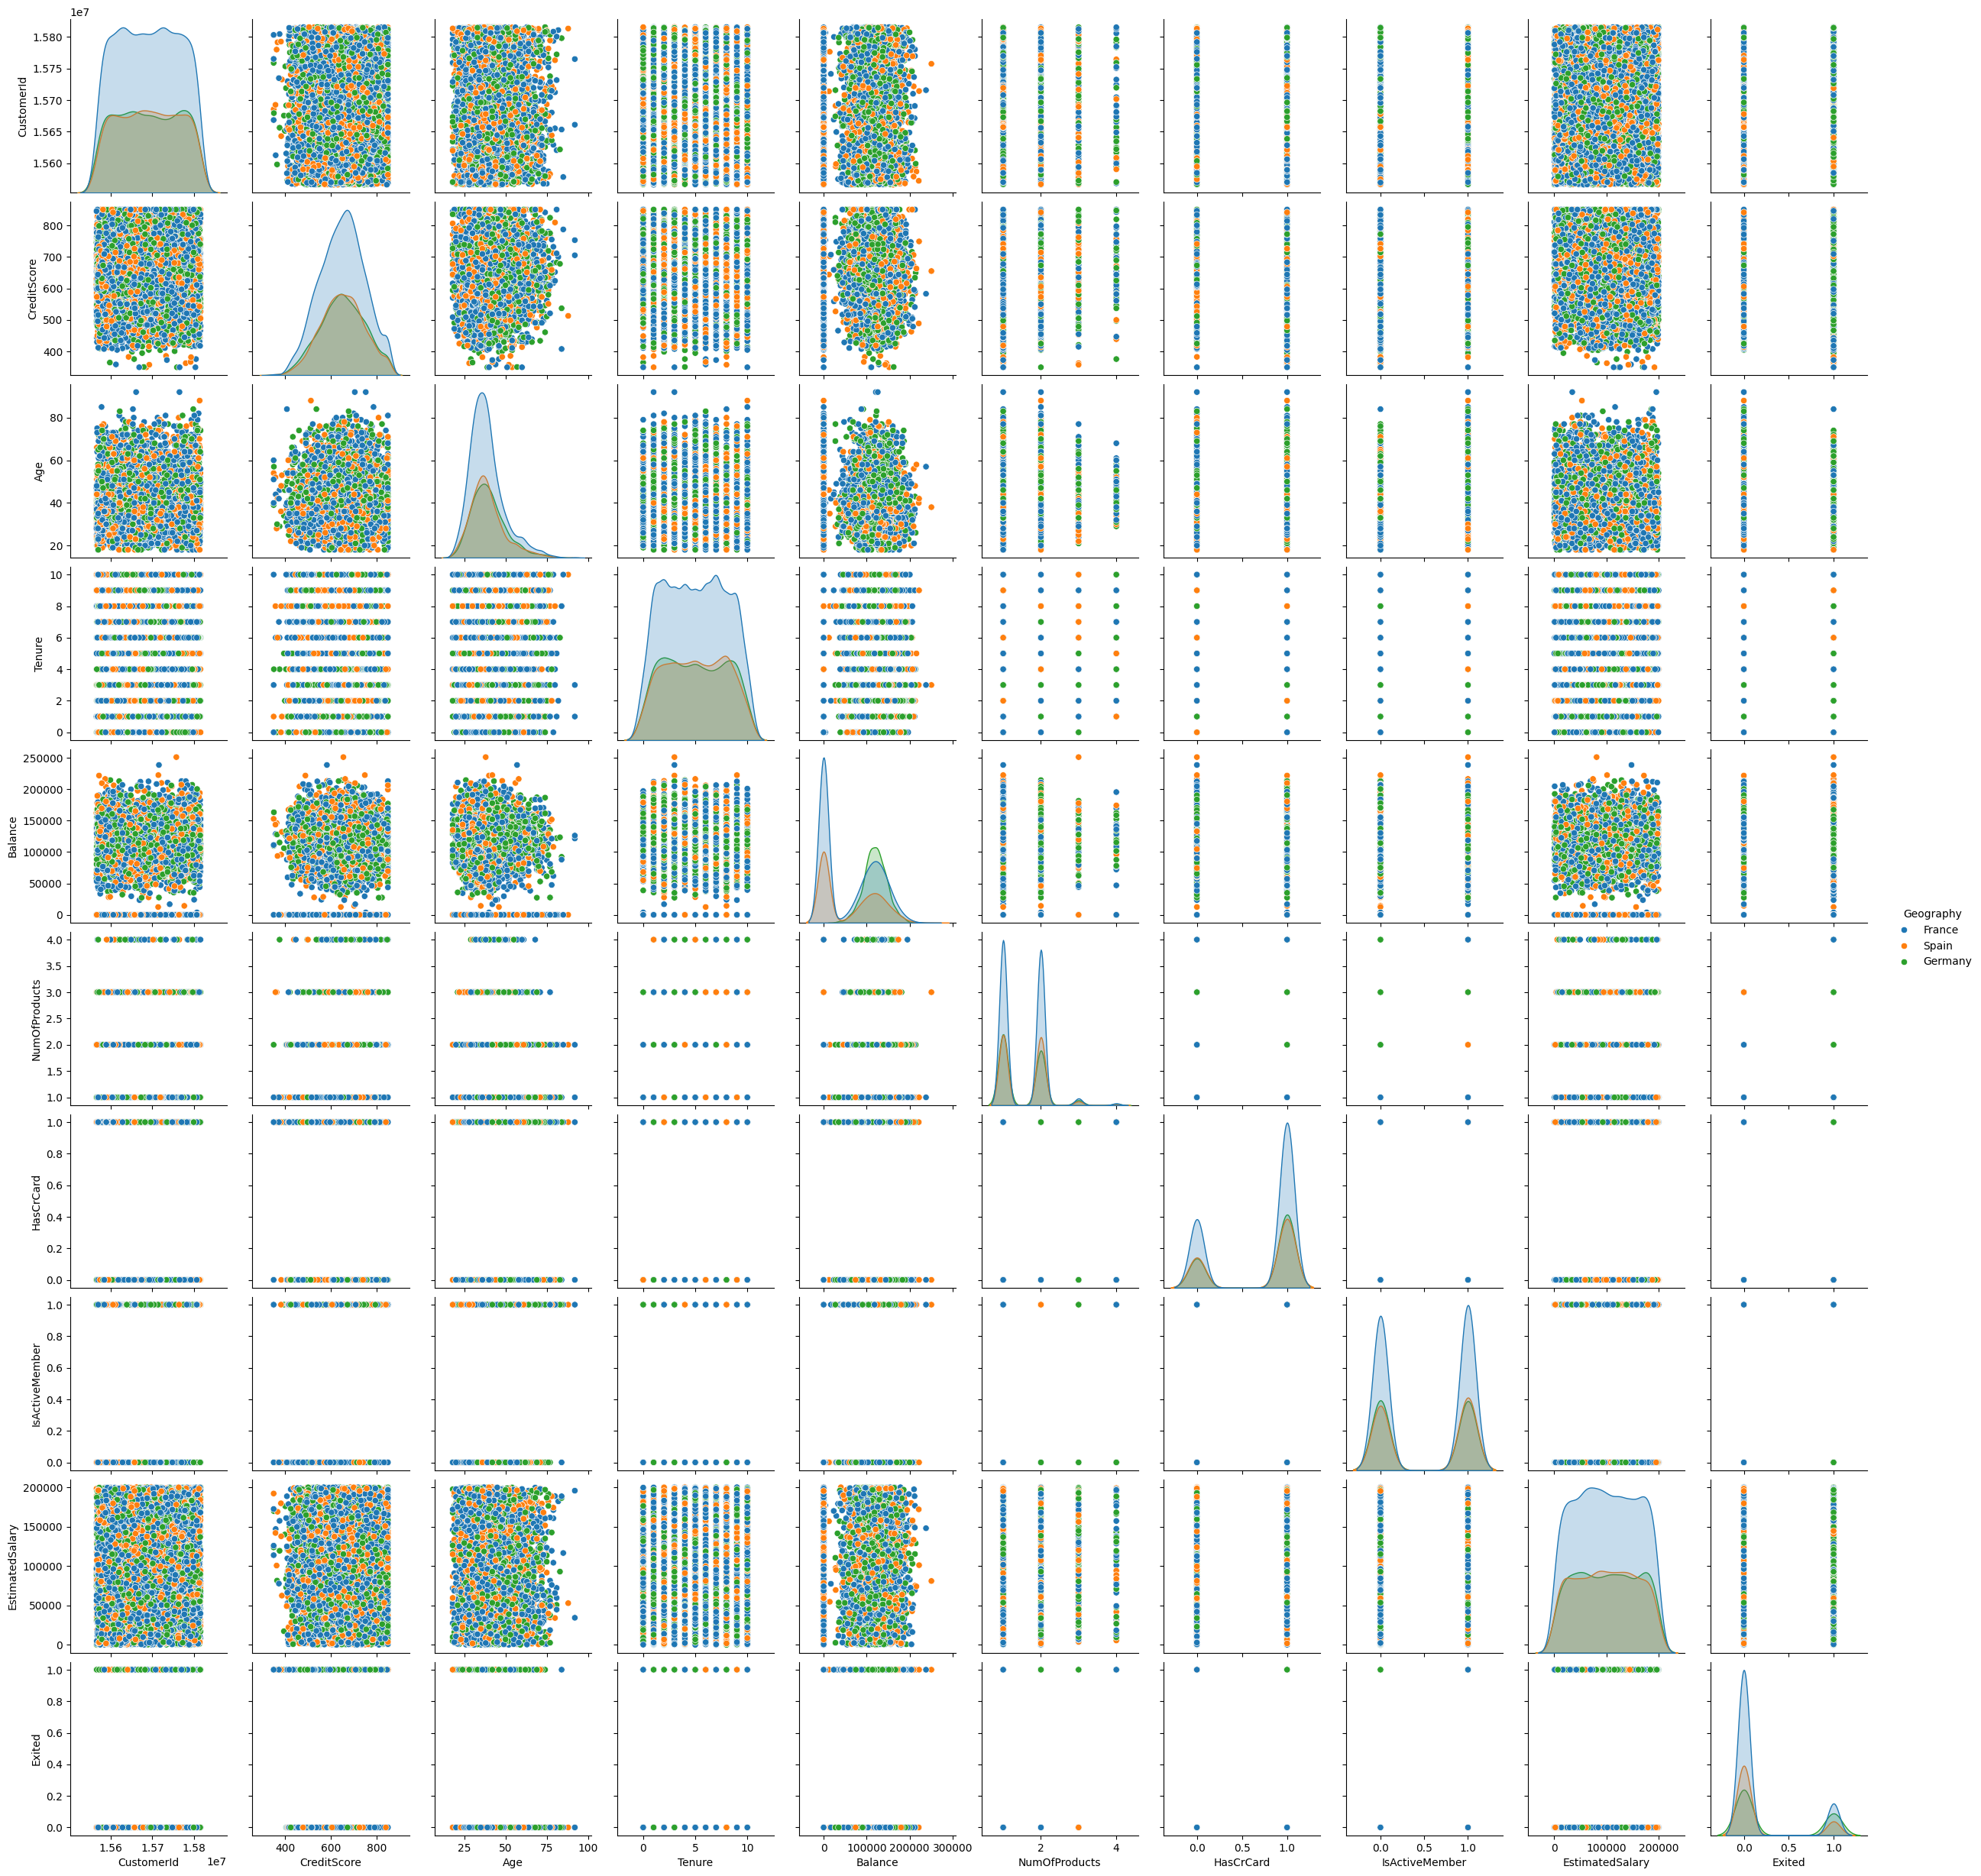

In [98]:
sns.pairplot(df, hue='Geography')
plt.show()

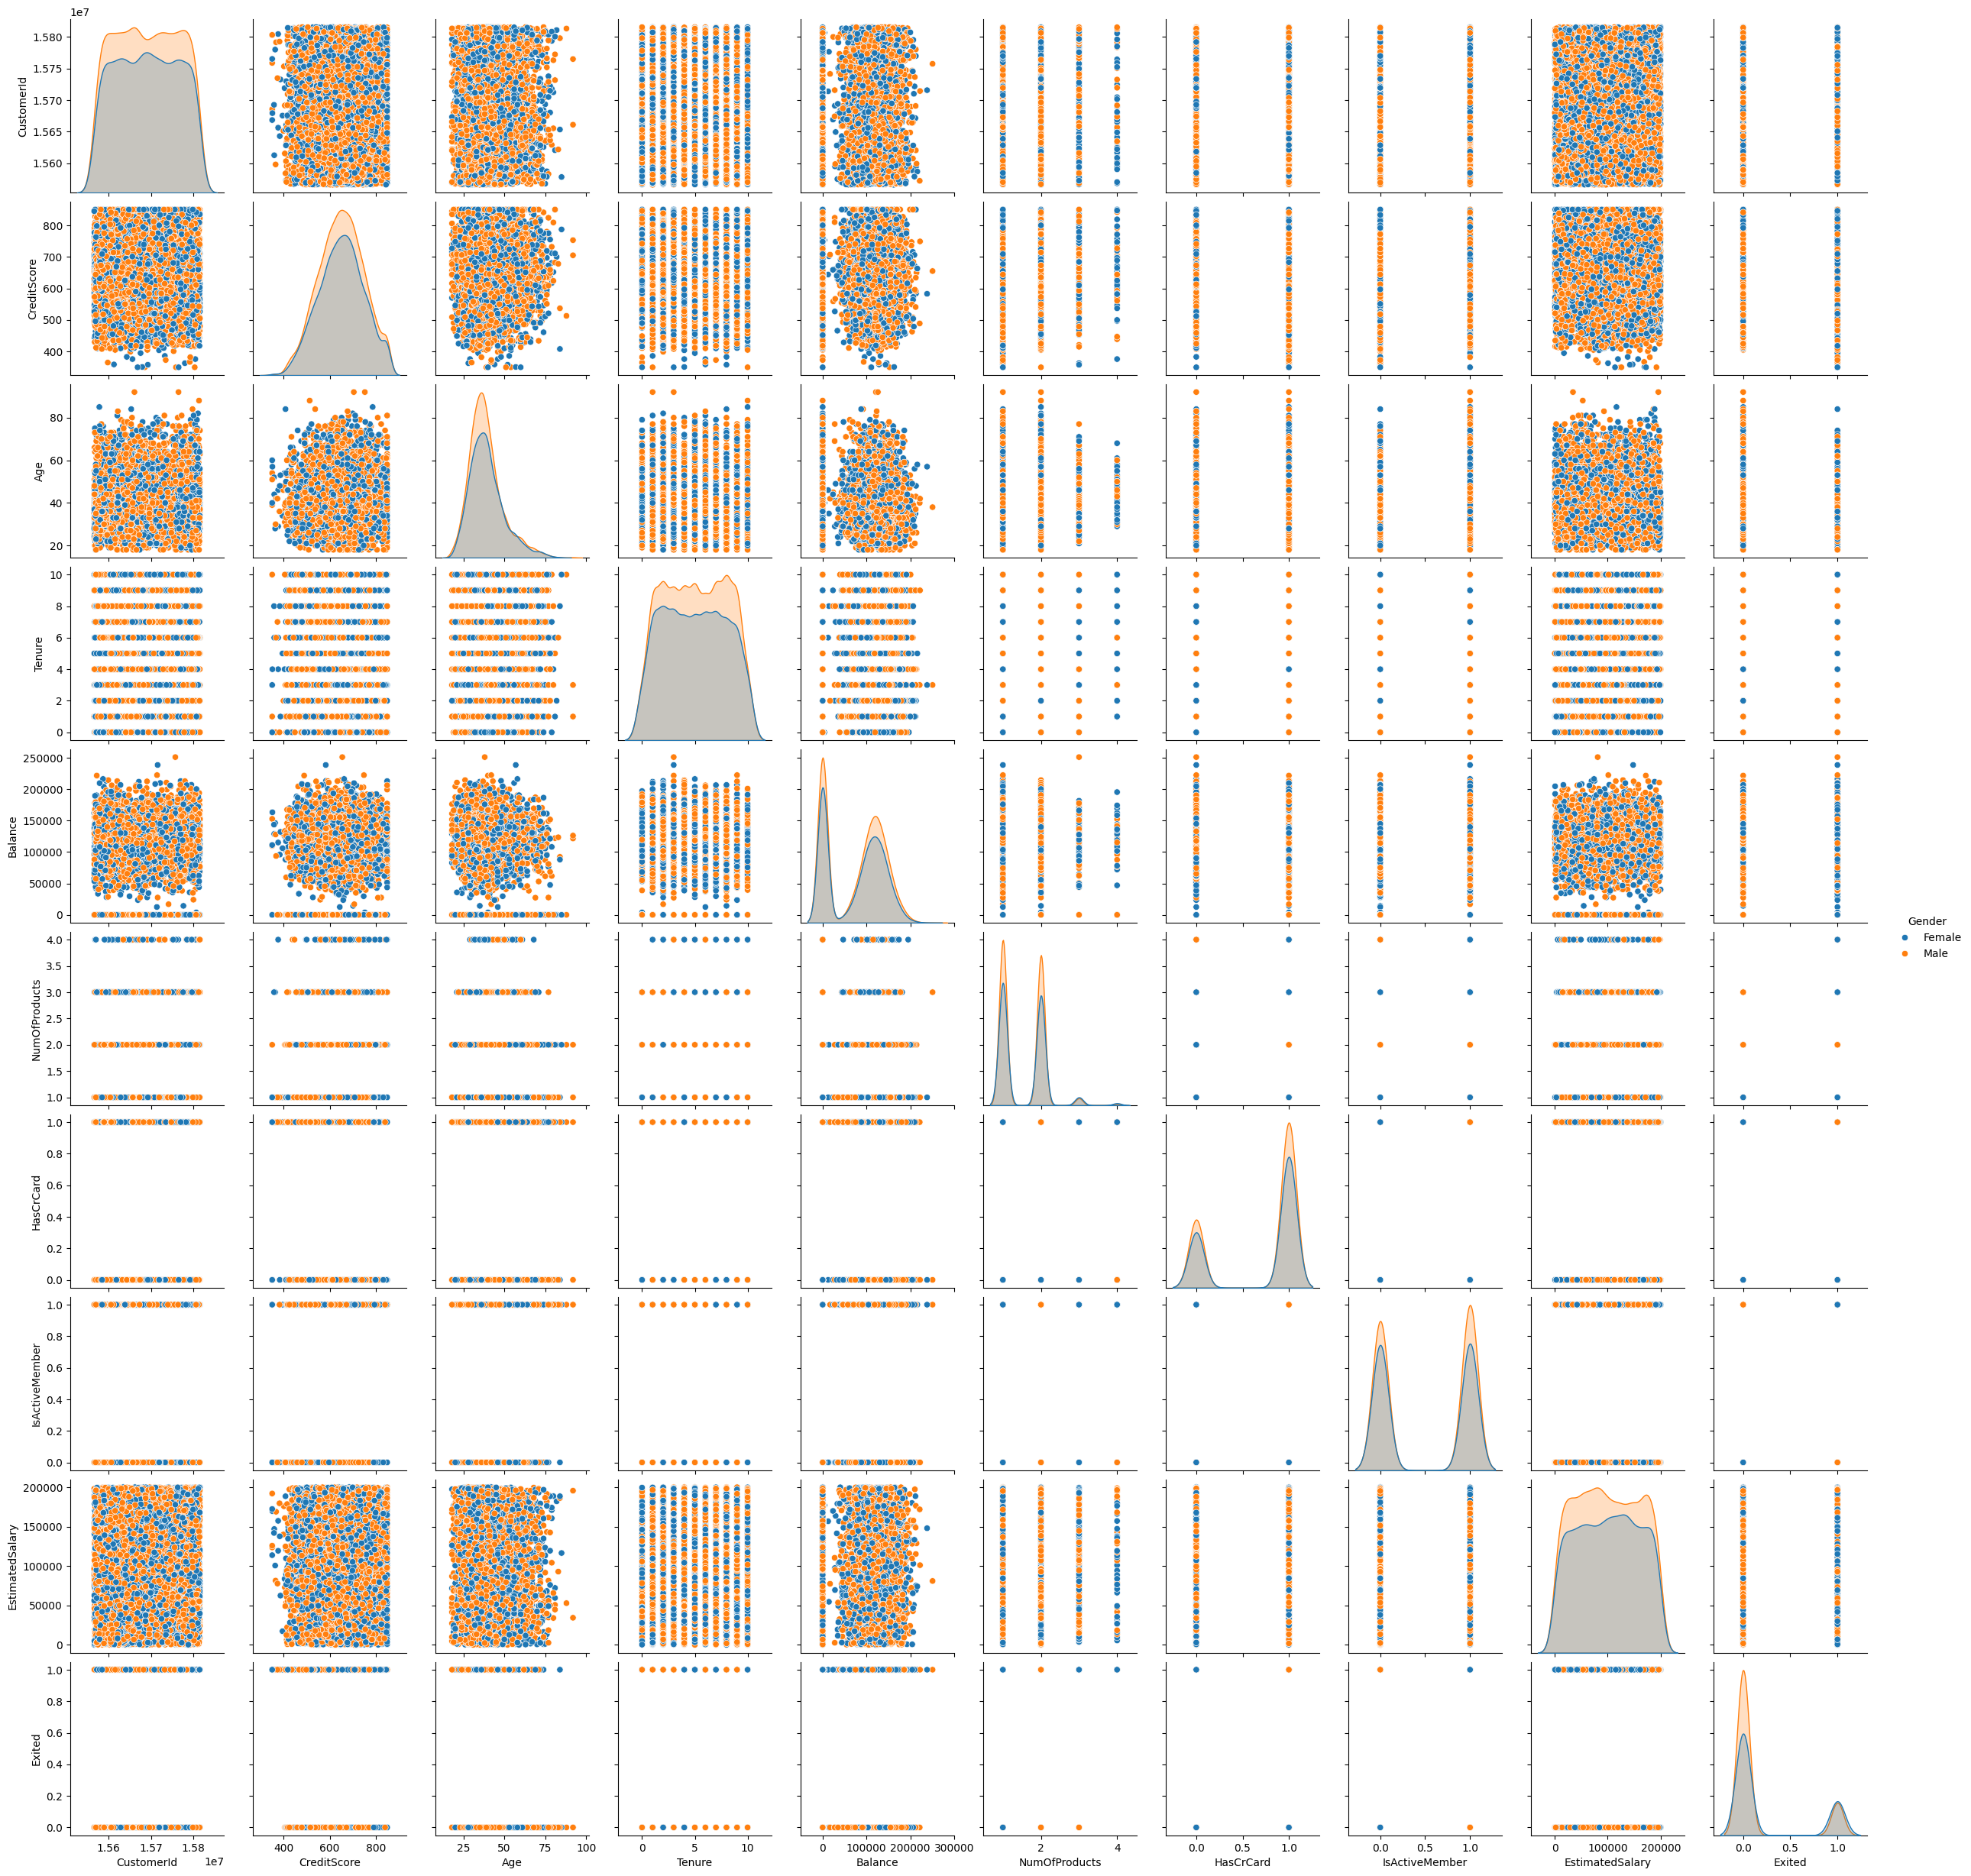

In [99]:
sns.pairplot(df, hue='Gender')
plt.show()

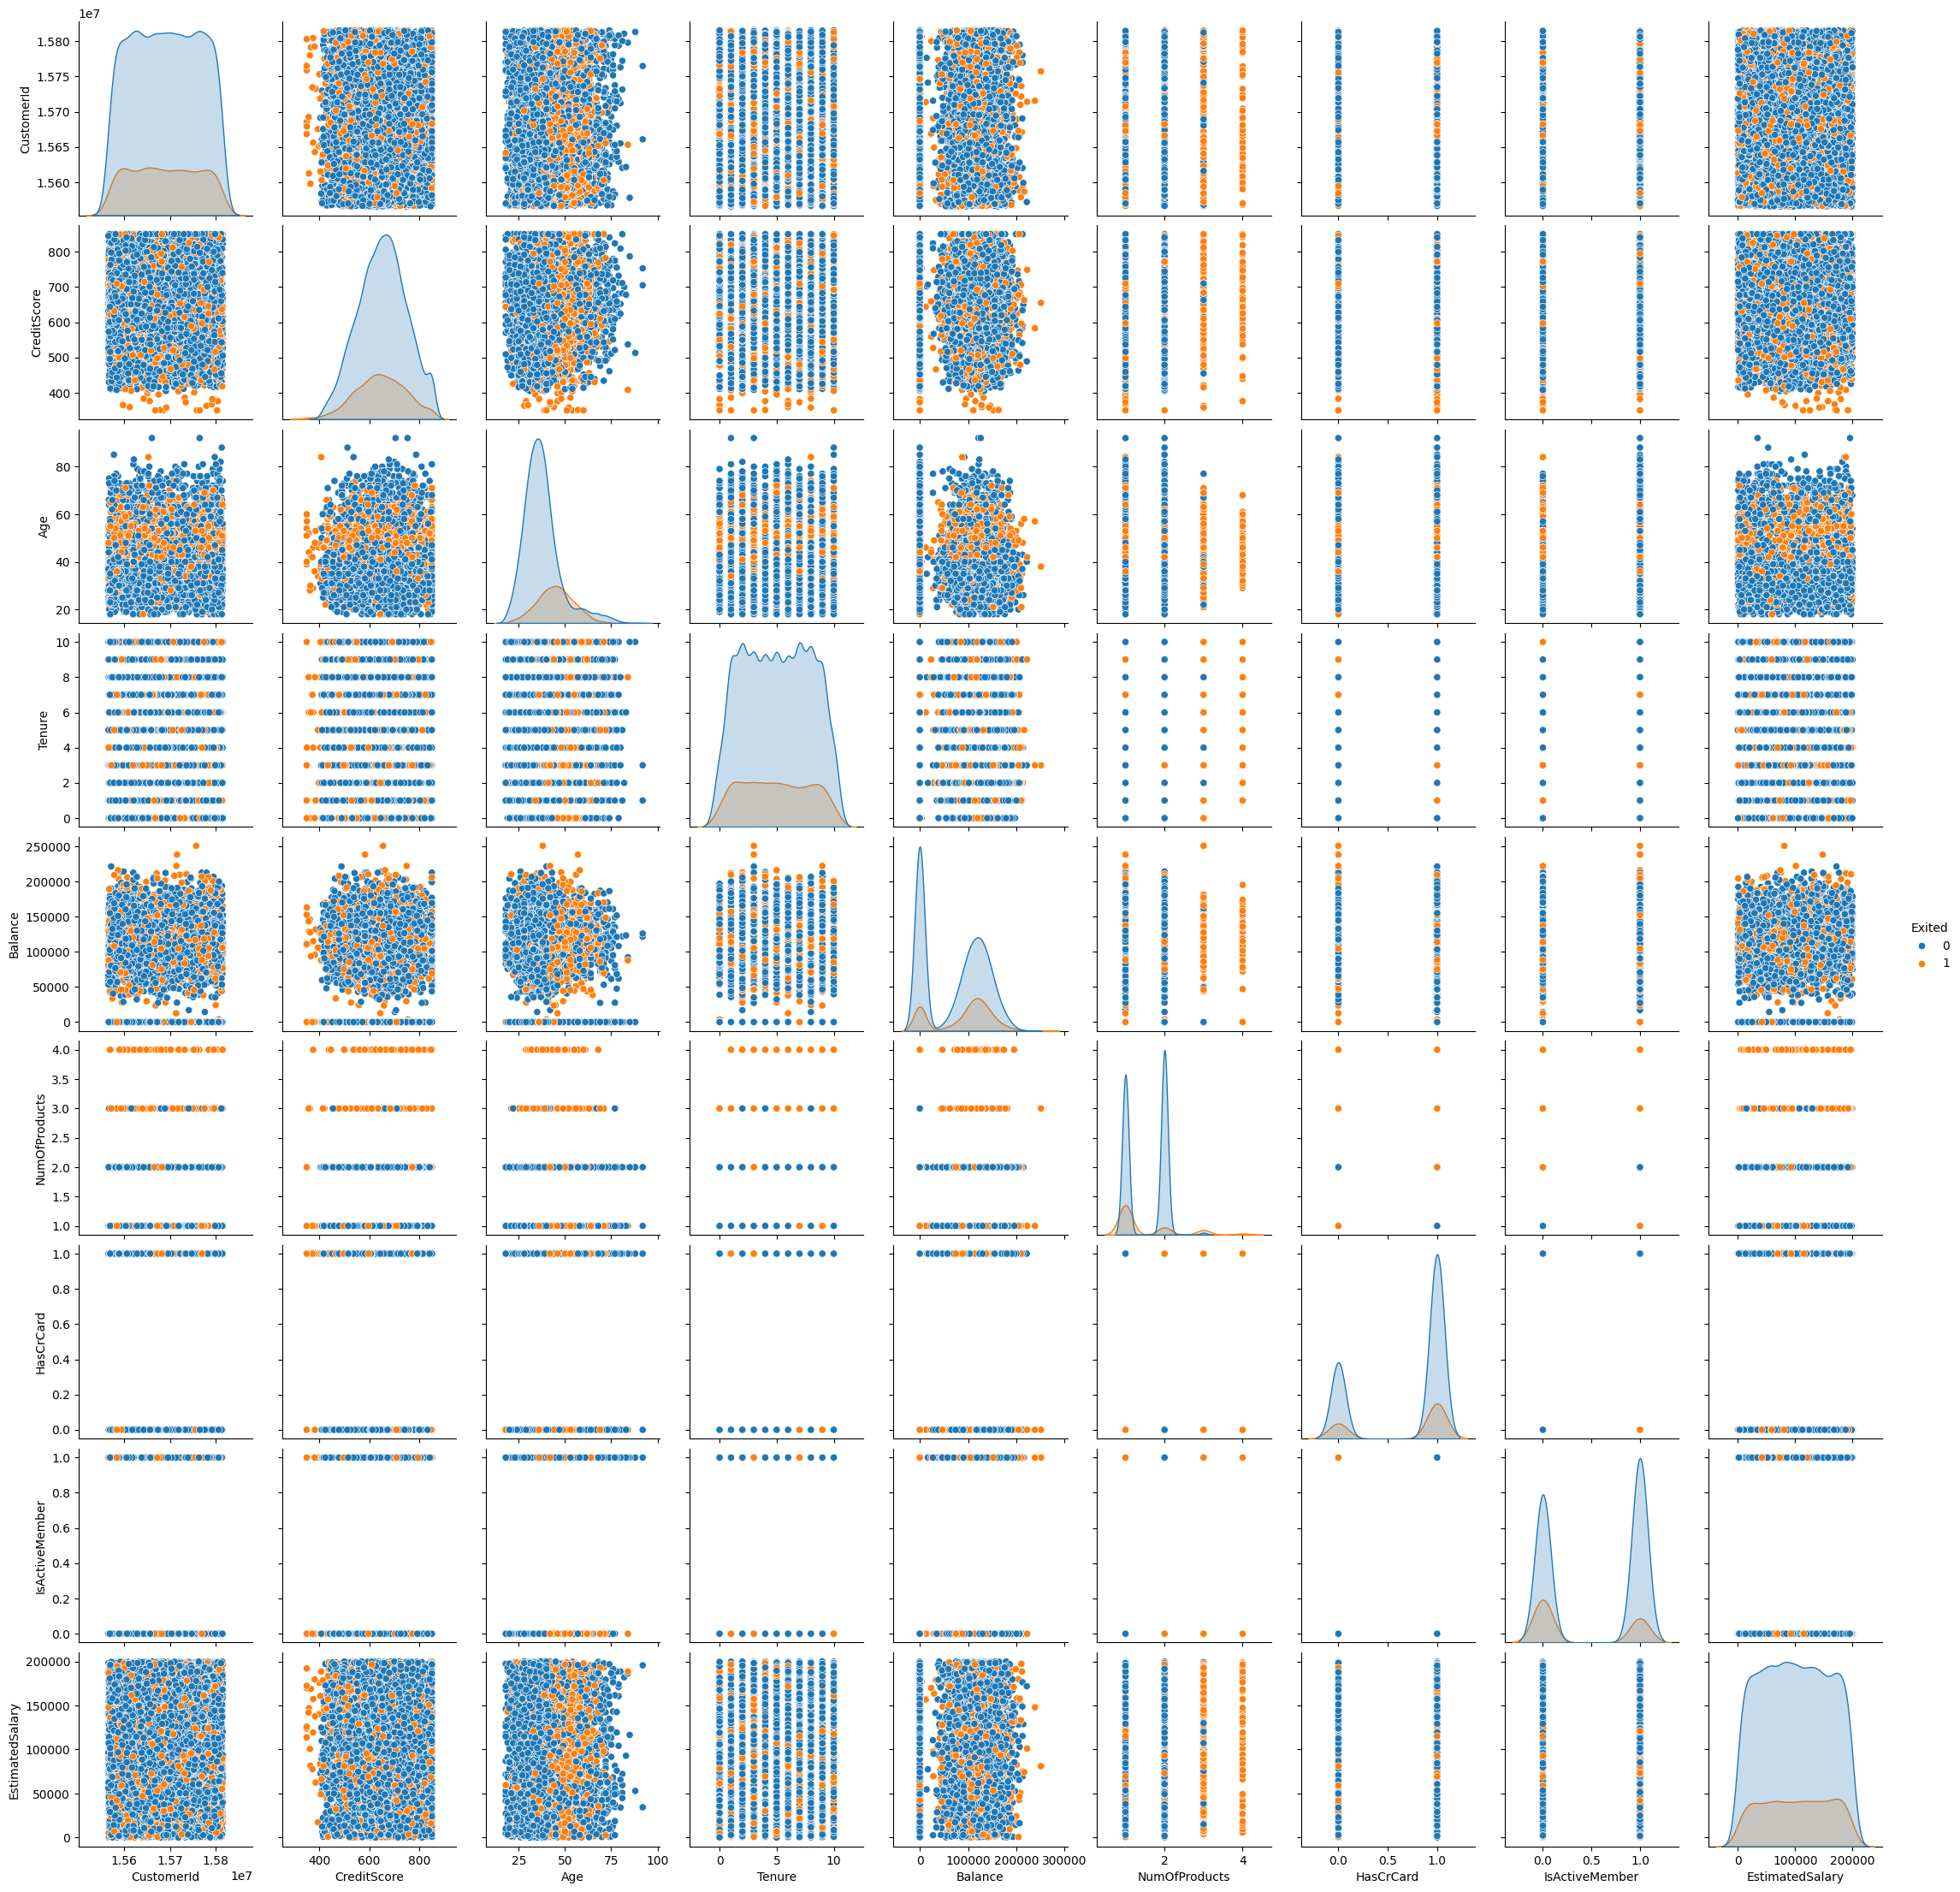

In [100]:
sns.pairplot(df, hue='Exited')
plt.show()